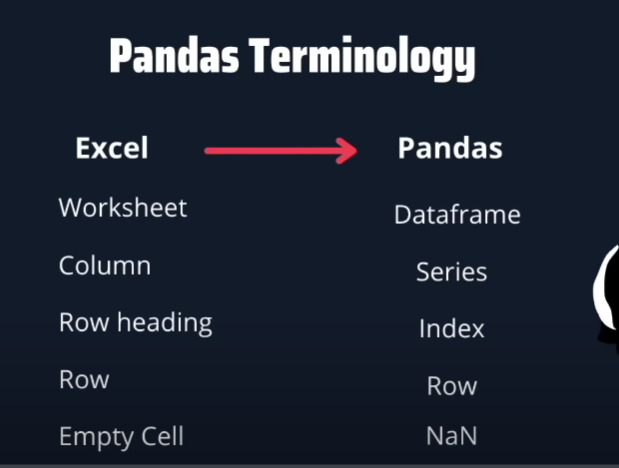

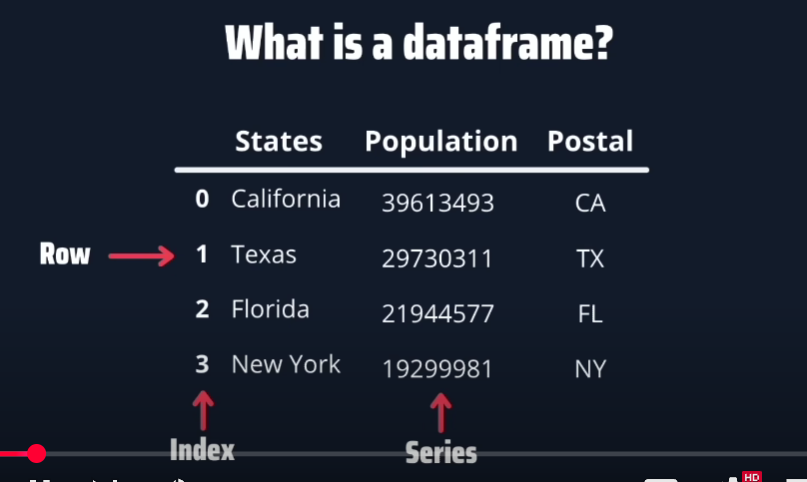

Numpy is under the wood of python 


In [2]:
import numpy as np
import pandas as pd
array = np.array([[1,2],[4,5],[7,8]])
print(array)
df = pd.DataFrame(array, columns=['Column1', 'Column2'])
print(df)

[[1 2]
 [4 5]
 [7 8]]
   Column1  Column2
0        1        2
1        4        5
2        7        8


In [5]:
# create a dataframe from a dictionary
data = { 'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35], 'City': ['New York', 'Los Angeles', 'Chicago'] }
df2 = pd.DataFrame(data)
print(df2)

      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago


In [3]:
# create a dataframe from a list of lists
data2 = [ ['Alice', 25, 'New York'], ['Bob', 30 , 'Los Angeles'], ['Charlie', 35, 'Chicago'] ]
df3 = pd.DataFrame(data2, columns=['Name', 'Age', 'City'])
print(df3)

      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago


In [4]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

In [5]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [6]:
print(chipo['order_id'][chipo['item_name']=='Veggie Salad Bowl'].count())

18


In [8]:
chipo.sort_values(by=['item_price','order_id'], ascending=True).head()

,order_id,quantity,item_name,choice_description,item_price
28,14,1,Canned Soda,[Dr. Pepper],$1.09
34,17,1,Bottled Water,NaN,$1.09
53,24,1,Canned Soda,[Sprite],$1.09
87,38,1,Bottled Water,NaN,$1.09
107,47,1,Canned Soda,[Dr. Pepper],$1.09


In [17]:
print("$",chipo['item_price'].replace('[/$,]', '', regex=True).astype(float).sum())
# chipo['choice_description'].replace(np.nan,'not present')

$ 34500.16


In [29]:
chipo.iloc[:1,0:2].sum(axis=1)

0    2
dtype: int64

process of data cleaning  -- data munging or data wrangling

In [2]:
import pandas as pd
df = pd.DataFrame({"anto":[1,2,3], "beto":[4,5,6]})
print(df)

   anto  beto
0     1     4
1     2     5
2     3     6


In [3]:
df.columns

Index(['anto', 'beto'], dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [6]:
df['anto'].dtype

dtype('int64')

In [11]:
chipo['quantity'].max() , chipo['quantity'].mean(), chipo['quantity'].sum()

(np.int64(15), np.float64(1.0757247944612722), np.int64(4972))

In [12]:
chipo['item_name'].value_counts().head(10)

item_name
Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: count, dtype: int64

In [13]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [15]:
# conditional selection in pandas
chipo['item_name'][chipo['item_name']=='Veggie Salad Bowl'].head(3)

186    Veggie Salad Bowl
295    Veggie Salad Bowl
455    Veggie Salad Bowl
Name: item_name, dtype: object

In [20]:

chipo.index,chipo.columns

(RangeIndex(start=0, stop=4622, step=1),
 Index(['order_id', 'quantity', 'item_name', 'choice_description',
        'item_price'],
       dtype='object'))

In [24]:
chipo.set_index('item_price', inplace=True)
chipo.head(3)

,quantity,item_name,choice_description
item_price,,,
$2.39,1,Chips and Fresh Tomato Salsa,NaN
$3.39,1,Izze,[Clementine]
$3.39,1,Nantucket Nectar,[Apple]


In [25]:
chipo.iloc

In [27]:
chipo.reset_index(inplace=True)

In [28]:
chipo.head(3)

,index,item_price,quantity,item_name,choice_description
0,0,$2.39,1,Chips and Fresh Tomato Salsa,NaN
1,1,$3.39,1,Izze,[Clementine]
2,2,$3.39,1,Nantucket Nectar,[Apple]


In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("walekhwatlphilip/intro-to-data-cleaning-eda-and-machine-learning")

print("Path to dataset files:", path)


/home/kelvin/miniconda3/envs/deep-gpu/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 9.73k/9.73k [00:00<00:00, 10.5MB/s]

Extracting files...
Path to dataset files: /home/kelvin/.cache/kagglehub/datasets/walekhwatlphilip/intro-to-data-cleaning-eda-and-machine-learning/versions/359


In [34]:
df = pd.read_csv(os.path.join(path, 'bi.csv'), encoding='latin1')

In [35]:
df.shape , df.columns

((77, 11),
 Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
        'prevEducation', 'studyHOURS', 'Python', 'DB'],
       dtype='object'))

In [36]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [37]:
df.dropna()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80
5,Hannah,Hansen,25,female,Norge,BI Residence,66,High School,130,88.0,59
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


In [43]:
df[df['studyHOURS'] == 150]

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43


In [44]:
df['studyHOURS'].mean()

np.float64(149.71428571428572)

(<Axes: >, <Axes: >)

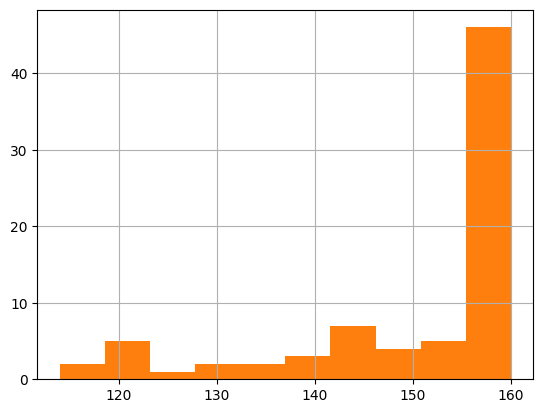

In [ ]:
df['studyHOURS'].hist()

<Axes: >

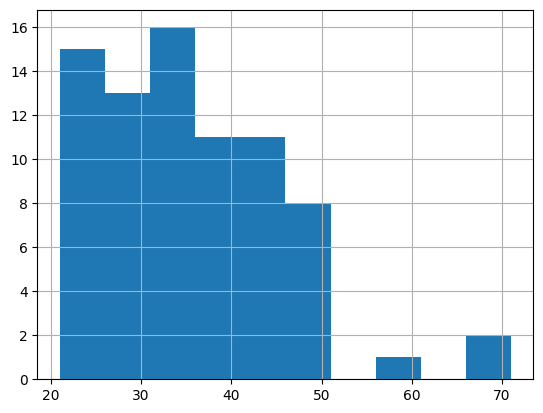

In [48]:
df['Age'].hist()

In [50]:
prob_edu = df['prevEducation'].value_counts(normalize=True)
prob_edu

prevEducation
Bachelors       0.311688
High School     0.233766
Masters         0.207792
Diploma         0.116883
Doctorate       0.064935
HighSchool      0.012987
Barrrchelors    0.012987
diploma         0.012987
DIPLOMA         0.012987
Diplomaaa       0.012987
Name: proportion, dtype: float64

In [66]:
prob_age = df['Age'].value_counts(normalize=True)
prob_age_cum = prob_age.sort_index()

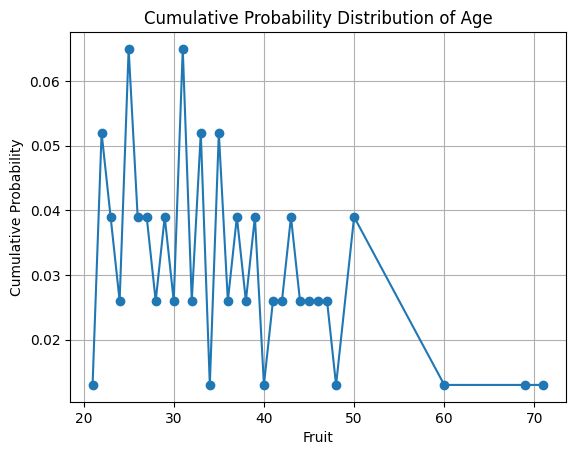

In [73]:
import matplotlib.pyplot as plt

prob_age_cum.plot(kind='line', marker='o')
plt.title('Cumulative Probability Distribution of Age')
plt.ylabel('Cumulative Probability')
plt.xlabel('Fruit')
plt.grid(True)
plt.show()


<Axes: xlabel='Age'>

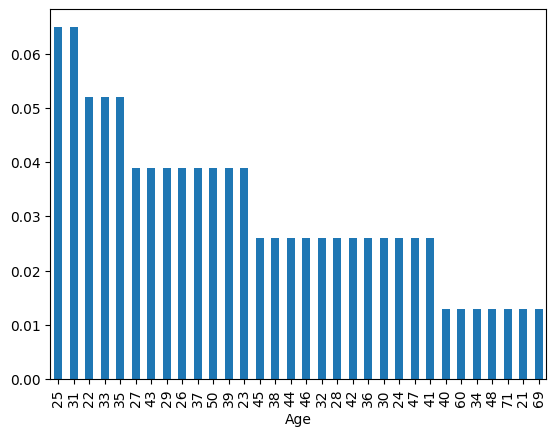

In [58]:
import matplotlib.pyplot as plt
# prob_edu.plot(kind='line')
prob_age.plot(kind='bar')

In [61]:
joint_prob = pd.crosstab(
	[df['prevEducation'], df['gender'], df['residence']],
	df['Age'],
	normalize='all'
)

<Axes: xlabel='Age', ylabel='prevEducation-gender-residence'>

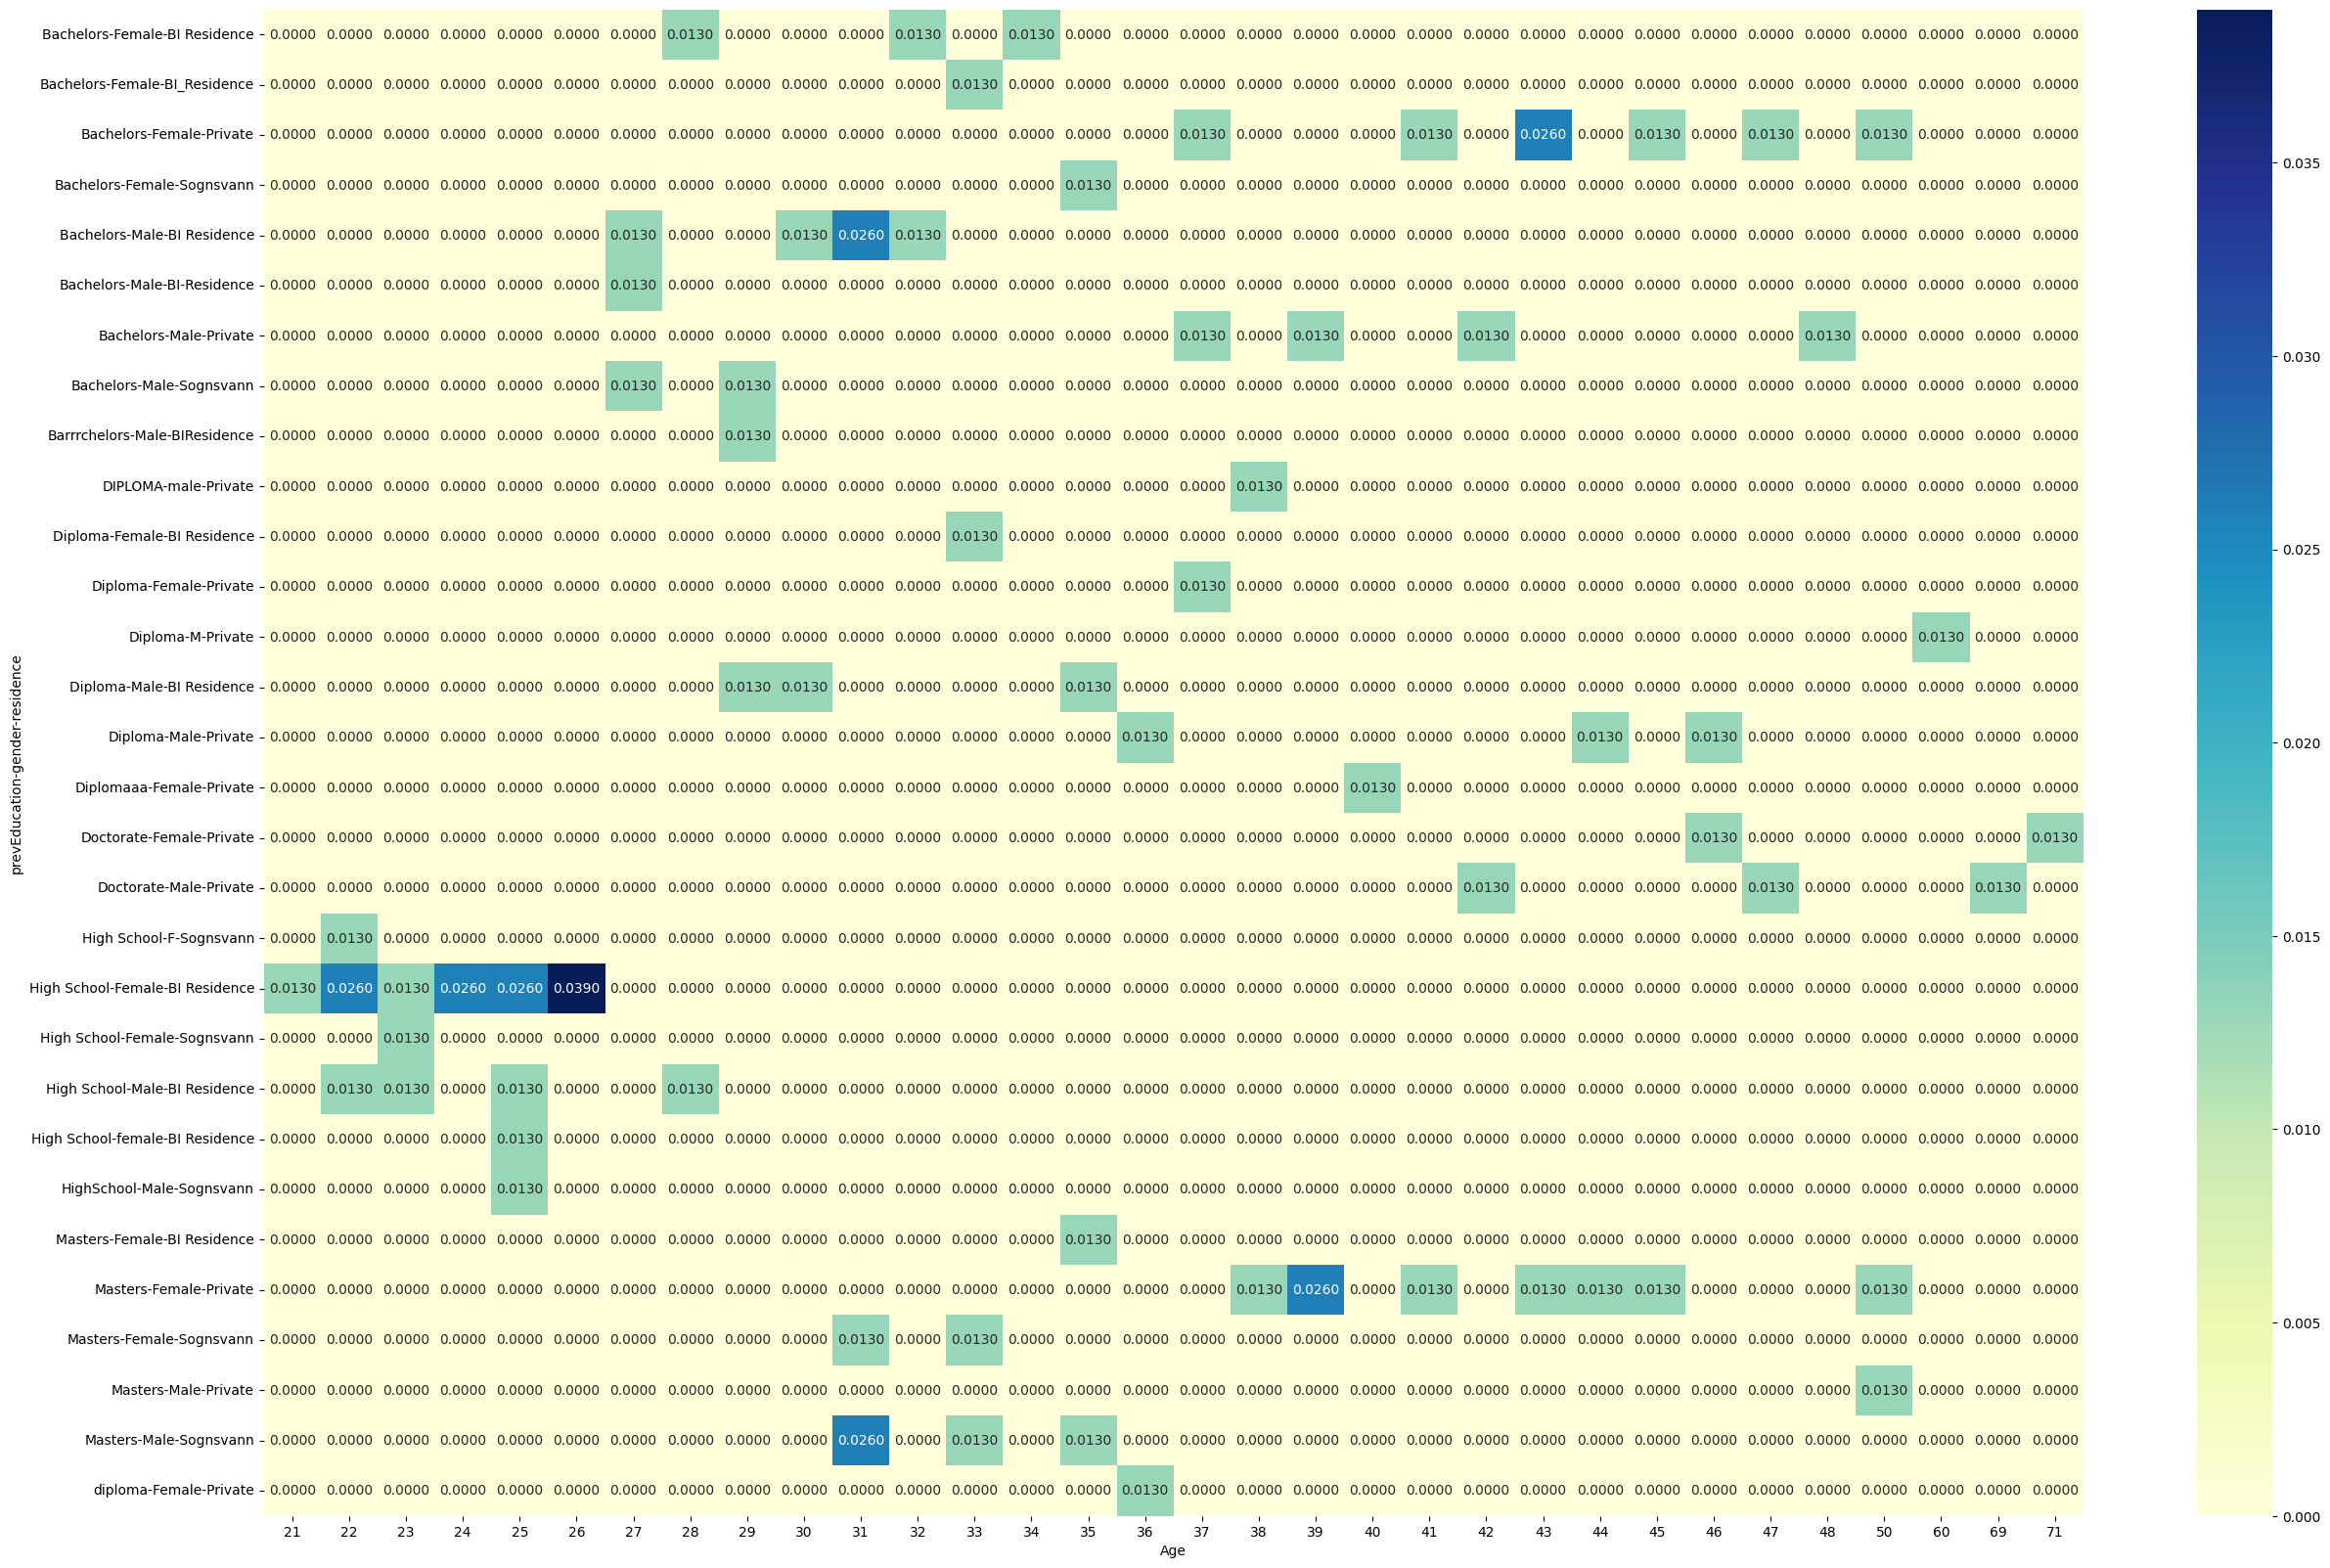

In [63]:
plt.figure(figsize=(30,20))
import seaborn as sns
sns.heatmap(joint_prob, annot=True, fmt='.4f', cmap='YlGnBu')

In [65]:
joint_prob

Age                                      21        22        23        24  \
prevEducation gender residence                                              
Bachelors     Female BI Residence  0.000000  0.000000  0.000000  0.000000   
                     BI_Residence  0.000000  0.000000  0.000000  0.000000   
                     Private       0.000000  0.000000  0.000000  0.000000   
                     Sognsvann     0.000000  0.000000  0.000000  0.000000   
              Male   BI Residence  0.000000  0.000000  0.000000  0.000000   
                     BI-Residence  0.000000  0.000000  0.000000  0.000000   
                     Private       0.000000  0.000000  0.000000  0.000000   
                     Sognsvann     0.000000  0.000000  0.000000  0.000000   
Barrrchelors  Male   BIResidence   0.000000  0.000000  0.000000  0.000000   
DIPLOMA       male   Private       0.000000  0.000000  0.000000  0.000000   
Diploma       Female BI Residence  0.000000  0.000000  0.000000  0.000000   
                     Private       0.000000  0.000000  0.000000  0.000000   
              M      Private       0.000000  0.000000  0.000000  0.000000   
              Male   BI Residence  0.000000  0.000000  0.000000  0.000000   
                     Private       0.000000  0.000000  0.000000  0.000000   
Diplomaaa     Female Private       0.000000  0.000000  0.000000  0.000000   
Doctorate     Female Private       0.000000  0.000000  0.000000  0.000000   
              Male   Private       0.000000  0.000000  0.000000  0.000000   
High School   F      Sognsvann     0.000000  0.012987  0.000000  0.000000   
              Female BI Residence  0.012987  0.025974  0.012987  0.025974   
                     Sognsvann     0.000000  0.000000  0.012987  0.000000   
              Male   BI Residence  0.000000  0.012987  0.012987  0.000000   
              female BI Residence  0.000000  0.000000  0.000000  0.000000   
HighSchool    Male   Sognsvann     0.000000  0.000000  0.000000  0.000000   
Masters       Female BI Residence  0.000000  0.000000  0.000000  0.000000   
                     Private       0.000000  0.000000  0.000000  0.000000   
                     Sognsvann     0.000000  0.000000  0.000000  0.000000   
              Male   Private       0.000000  0.000000  0.000000  0.000000   
                     Sognsvann     0.000000  0.000000  0.000000  0.000000   
diploma       Female Private       0.000000  0.000000  0.000000  0.000000   

Age                                      25        26        27        28  \
prevEducation gender residence                                              
Bachelors     Female BI Residence  0.000000  0.000000  0.000000  0.012987   
                     BI_Residence  0.000000  0.000000  0.000000  0.000000   
                     Private       0.000000  0.000000  0.000000  0.000000   
                     Sognsvann     0.000000  0.000000  0.000000  0.000000   
              Male   BI Residence  0.000000  0.000000  0.012987  0.000000   
                     BI-Residence  0.000000  0.000000  0.012987  0.000000   
                     Private       0.000000  0.000000  0.000000  0.000000   
                     Sognsvann     0.000000  0.000000  0.012987  0.000000   
Barrrchelors  Male   BIResidence   0.000000  0.000000  0.000000  0.000000   
DIPLOMA       male   Private       0.000000  0.000000  0.000000  0.000000   
Diploma       Female BI Residence  0.000000  0.000000  0.000000  0.000000   
                     Private       0.000000  0.000000  0.000000  0.000000   
              M      Private       0.000000  0.000000  0.000000  0.000000   
              Male   BI Residence  0.000000  0.000000  0.000000  0.000000   
                     Private       0.000000  0.000000  0.000000  0.000000   
Diplomaaa     Female Private       0.000000  0.000000  0.000000  0.000000   
Doctorate     Female Private       0.000000  0.000000  0.000000  0.000000   
              Male   Private       0.000000  0.000000  0.000000  0.00000